<a href="https://colab.research.google.com/github/ValerieLangat/FD/blob/master/Tanzania_no3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders
!pip install pandas==0.23.4
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [2]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
pd.set_option('display.float_format', '{:.2f}'.format)

train = pd.merge(pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P'), 
                 pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f'))


test = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')


train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

print('train', train.shape)
print('val', val.shape)
print('test', test.shape)

train (47520, 41)
val (11880, 41)
test (14358, 40)


In [3]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.00,2011-07-27,NaN,0,NaN,33.54,-9.17,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.00,2011-03-23,Rc Church,2049,ACRA,34.67,-9.31,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.00,2011-03-07,Donor,290,Do,38.24,-6.18,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.00,2011-07-31,Government Of Tanzania,0,DWE,30.72,-1.29,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.00,2011-03-10,Water,0,Gove,35.39,-6.40,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [4]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2904
gps_height                   0
installer                 2917
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3128
scheme_name              22532
permit                    2443
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [0]:
train = train.drop(['scheme_name', 'scheme_management', 'wpt_name'], axis=1)

In [6]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.00,2011-07-27,NaN,0,NaN,33.54,-9.17,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.00,2011-03-23,Rc Church,2049,ACRA,34.67,-9.31,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.00,2011-03-07,Donor,290,Do,38.24,-6.18,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.00,2011-07-31,Government Of Tanzania,0,DWE,30.72,-1.29,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.00,2011-03-10,Water,0,Gove,35.39,-6.40,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
8558,41546,0.00,2011-08-07,Dwe/norad,1295,DWE,31.21,-8.43,0,Lake Tanganyika,Kisumba Kati,Rukwa,15,2,Sumbawanga Rural,Kasanga,200,True,GeoData Consultants Ltd,True,1986,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
2559,16230,20000.00,2013-09-03,Oxfam,1515,DWE,36.70,-3.34,0,Pangani,Oroirwa,Arusha,2,2,Arusha Rural,Oltroto,150,True,GeoData Consultants Ltd,True,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
54735,10307,0.00,2011-04-17,Water,0,DWE,36.29,-5.18,0,Internal,Polisi,Dodoma,1,1,Kondoa,Mrijo,0,True,GeoData Consultants Ltd,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
25763,37145,0.00,2011-08-03,Danida,0,DANIDA,32.88,-8.93,0,Lake Rukwa,Bagamoyo,Mbeya,12,6,Mbozi,Halungu,0,False,GeoData Consultants Ltd,False,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
44540,49234,0.00,2011-08-03,Tancan,0,TANCAN,33.01,-3.12,0,Lake Victoria,Mwanzuki,Mwanza,19,7,Missungwi,Shilalo,0,True,GeoData Consultants Ltd,True,0,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other,non functional


In [7]:
train.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [8]:
status = train['status_group'].copy()
status.head()

43360        functional
7263         functional
2486         functional
313      non functional
52726        functional
Name: status_group, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train['status_group'] = LE.fit_transform(train['status_group'])

In [10]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.00,2011-07-27,NaN,0,NaN,33.54,-9.17,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,0
7263,65358,500.00,2011-03-23,Rc Church,2049,ACRA,34.67,-9.31,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
2486,469,25.00,2011-03-07,Donor,290,Do,38.24,-6.18,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0
313,1298,0.00,2011-07-31,Government Of Tanzania,0,DWE,30.72,-1.29,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,2
52726,27001,0.00,2011-03-10,Water,0,Gove,35.39,-6.40,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,0


In [11]:
d = train.status_group.unique()
d

array([0, 2, 1])

In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.float_format', '{:.2f}'.format)


train = pd.merge(pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P'), 
                 pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f'))


test = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')


train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)


def wrangle(X):
    """Wrangles train, validate, and test sets in the same way"""
    X = X.copy()

    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    X['years'] = X['year_recorded'] - X['construction_year']    
    
    X = X.drop(columns=['recorded_by', 'id'])
    
    duplicate_columns = ['quantity_group']
    X = X.drop(columns=duplicate_columns)
    
    X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
    
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
target = 'status_group'
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features = numeric_features + categorical_features



In [14]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier(max_depth=20, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-03.csv', index=False)


Validation Accuracy 0.7712121212121212


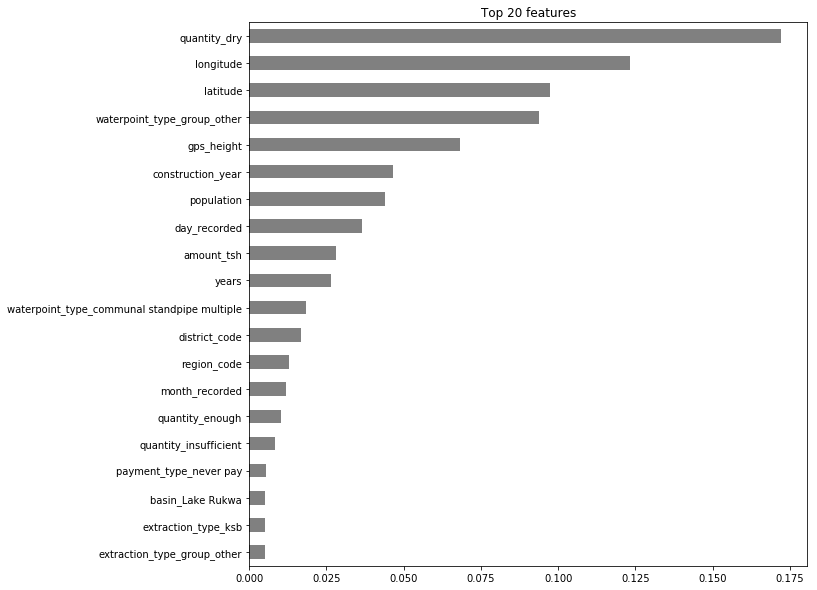

In [15]:
encoder = pipeline.named_steps['onehotencoder']
tree = pipeline.named_steps['decisiontreeclassifier']
feature_names = encoder.transform(X_val).columns
importances = pd.Series(tree.feature_importances_, feature_names)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

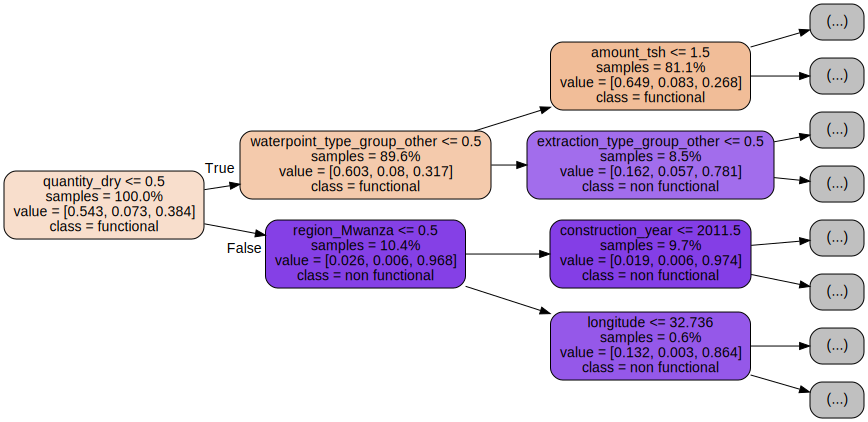

In [16]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, 
                           out_file=None, 
                           max_depth=2, 
                           feature_names=feature_names, 
                           class_names=tree.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rotate=True, 
                           rounded=True)

graphviz.Source(dot_data)

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8087542087542088
CPU times: user 27 s, sys: 441 ms, total: 27.5 s
Wall time: 16.3 s


In [18]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['onehotencoder']
shape = encoder.transform(X_train).shape
print('X_train shape after encoding', shape)

X_train shape before encoding (47520, 33)
X_train shape after encoding (47520, 183)


In [19]:
%%time
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8104377104377104
CPU times: user 21.8 s, sys: 354 ms, total: 22.1 s
Wall time: 12 s


In [20]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
shape = encoder.transform(X_train).shape
print('X_train shape after encoding', shape)

X_train shape before encoding (47520, 40)
X_train shape after encoding (47520, 40)


In [21]:
X_train.head(3)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,years
43360,0.00,MISSING,nan,MISSING,33.54,-9.17,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,nan,True,VWC,K,MISSING,nan,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2011,7,27,2011
7263,500.00,Rc Church,2049.00,ACRA,34.67,-9.31,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175.00,True,WUA,Tove Mtwango gravity Scheme,True,2008.00,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,23,3
2486,25.00,Donor,290.00,Do,38.24,-6.18,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300.00,True,VWC,MISSING,False,2010.00,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,7,1


In [22]:
imputer = pipeline.named_steps['simpleimputer']
X_train_encoded = encoder.transform(X_train)
X_train_imputed = imputer.transform(X_train_encoded)
pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns).head(10)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,years
0,0.00,1.00,1167.00,1.00,33.54,-9.17,1.00,0.00,1.00,1.00,1.00,12.00,4.00,1.00,1.00,150.00,1.00,1.00,1.00,1.00,2000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2011.00,7.00,27.00,2011.00
1,500.00,2.00,2049.00,2.00,34.67,-9.31,2.00,0.00,2.00,2.00,2.00,11.00,4.00,2.00,2.00,175.00,1.00,2.00,2.00,2.00,2008.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2011.00,3.00,23.00,3.00
2,25.00,3.00,290.00,3.00,38.24,-6.18,3.00,0.00,3.00,3.00,3.00,6.00,1.00,3.00,3.00,2300.00,1.00,1.00,3.00,3.00,2010.00,2.00,2.00,2.00,1.00,1.00,3.00,3.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,2011.00,3.00,7.00,1.00
3,0.00,4.00,1167.00,4.00,30.72,-1.29,4.00,0.00,4.00,4.00,4.00,18.00,1.00,4.00,4.00,150.00,1.00,3.00,3.00,2.00,2000.00,3.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,1.00,3.00,3.00,2011.00,7.00,31.00,2011.00
4,0.00,5.00,1167.00,5.00,35.39,-6.40,5.00,0.00,5.00,5.00,5.00,1.00,6.00,5.00,5.00,150.00,1.00,1.00,4.00,2.00,2000.00,4.00,4.00,4.00,1.00,1.00,3.00,3.00,1.00,1.00,2.00,3.00,3.00,1.00,1.00,1.00,2011.00,3.00,10.00,2011.00
5,0.00,6.00,1295.00,4.00,31.21,-8.43,6.00,0.00,6.00,6.00,6.00,15.00,2.00,6.00,6.00,200.00,1.00,1.00,5.00,2.00,1986.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,4.00,2.00,1.00,1.00,2011.00,8.00,7.00,25.00
6,20000.00,7.00,1515.00,4.00,36.70,-3.34,7.00,0.00,7.00,7.00,7.00,2.00,2.00,7.00,7.00,150.00,1.00,1.00,6.00,2.00,1995.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,1.00,2013.00,9.00,3.00,18.00
7,0.00,5.00,1167.00,4.00,36.29,-5.18,8.00,0.00,5.00,8.00,5.00,1.00,1.00,8.00,8.00,150.00,1.00,1.00,7.00,3.00,2000.00,4.00,4.00,4.00,1.00,1.00,3.00,3.00,1.00,1.00,2.00,3.00,3.00,1.00,1.00,1.00,2011.00,4.00,17.00,2011.00
8,0.00,8.00,1167.00,6.00,32.88,-8.93,9.00,0.00,8.00,9.00,1.00,12.00,6.00,9.00,9.00,150.00,2.00,1.00,3.00,3.00,2000.00,5.00,5.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,2011.00,8.00,3.00,2011.00
9,0.00,9.00,1167.00,7.00,33.01,-3.12,10.00,0.00,4.00,10.00,8.00,19.00,7.00,10.00,10.00,150.00,1.00,1.00,3.00,2.00,2000.00,6.00,6.00,5.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,3.00,3.00,1.00,3.00,3.00,2011.00,8.00,3.00,2011.00


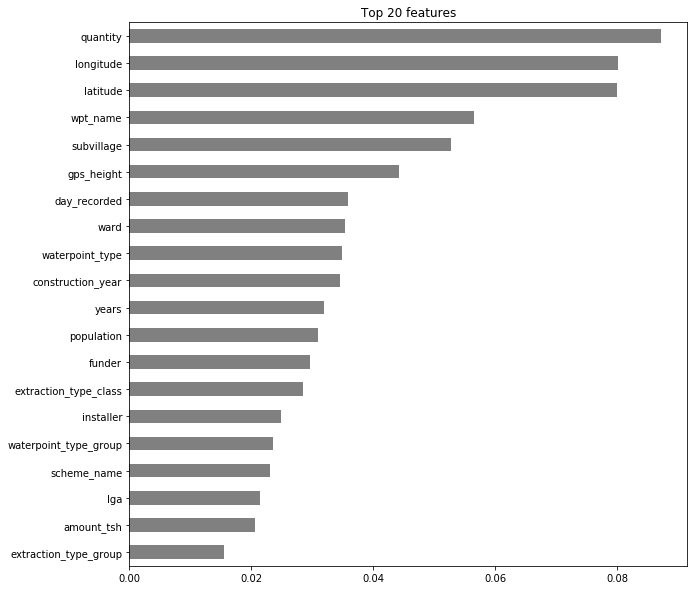

In [23]:
encoder = pipeline.named_steps['ordinalencoder']
rf = pipeline.named_steps['randomforestclassifier']
feature_names = encoder.transform(X_train).columns
importances = pd.Series(rf.feature_importances_, feature_names)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [24]:
X_train.select_dtypes(exclude='number').nunique().sort_values(ascending=False)

wpt_name                 30661
subvillage               17232
scheme_name               2564
ward                      2082
installer                 1930
funder                    1717
lga                        124
region                      21
extraction_type             18
scheme_management           13
extraction_type_group       13
management                  12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
waterpoint_type              7
payment                      7
payment_type                 7
source_type                  7
quality_group                6
waterpoint_type_group        6
management_group             5
quantity                     5
permit                       3
public_meeting               3
source_class                 3
dtype: int64

In [25]:
X_train['funder'].nunique()

1717

In [26]:
X_val['funder'].nunique()

858

In [27]:
pd.get_dummies(X_train['funder']).head(5)

,0,A/co Germany,Aar,Abas Ka,Abasia,Abd,Abddwe,Abdul,Abood,Aco/germany,Acord,Acord Ngo,Acra,Act,Action Aid,Action Contre La Faim,Action In A,Adap,Adb,Adf,Adp,Adp Mombo,Adp/w,Adra,Af,Afdp,Afric,Africa,Africa 2000 Network/undp,Africa Amini Alama,African,African 2000 Network,African Barrick Gold,African Development Bank,African Development Foundation,African Muslim Agency,African Reflections Foundation,African Relie,Africaone Ltd,Africare,...,Wfp/tnt,Wfp/tnt/usaid,Wfp/usaid,Wfp/usaid/tnt,William Acleus,Williamson Diamond Ltd,Wilson,Winkyens,Wirara Ya Maji,Wizara,Women Fo Partnership,Women For Partnership,World Bank,World Bank/government,World Vision,World Vision/ Kkkt,World Vision/adra,World Vision/rc Church,Worldvision,Woyege,Wrssp,Wsdo,Wsdp,Wsdp & Sdg,Wspd,Wssp,Wua,Wua And Ded,Wvc,Wvt,Wwf,Yasi Naini,Yasini Selemani,Zaben,Zaburi And Neig,Zao,Zao Water Spring,Zao Water Spring X,Zinduka,Zingibali Secondary
43360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoder.fit_transform(X_train['funder']).head(5)

,funder_MISSING,funder_Rc Church,funder_Donor,funder_Government Of Tanzania,funder_Water,funder_Dwe/norad,funder_Oxfam,funder_Danida,funder_Tancan,funder_Fw,funder_District Council,funder_Private Individual,funder_Partage,funder_Dmdd,funder_Norad,funder_Hans,funder_Oxfarm,funder_Ru,funder_Rwssp,funder_Dhv\swis,funder_Lga,funder_Mission,funder_Shipo,funder_Missi,funder_Thomasi Busigaye,funder_Lwi,funder_Oikos E.Afrika,funder_Kkkt,funder_Roman,funder_Cmsr,funder_Fini Water,funder_None,funder_Hesawa,funder_Ka,funder_Ridep,funder_Unicef,funder_Dwsp,funder_Grumeti,funder_Ces(gmbh),funder_Watu Wa Ujerumani,...,funder_Bokera W,funder_Eno,funder_Hesawza,funder_Redet,funder_Cida,funder_Senapa,funder_Wahidi,funder_Piusi,funder_Manyovu Agriculture Institute,funder_Sda Church,funder_Cathoric,funder_Moyowosi Basin,funder_Hesswa,funder_Rafael Michael,funder_Tareto,funder_John Skwese,funder_Kitiangare Village Community,funder_Siss M. Minghetti,funder_Fpct Church,funder_Masai Land,funder_Muhindi,funder_Nasan,funder_Water Aid/dwe,funder_Vgovernment,funder_Swidish,funder_Nipon & Panoco,funder_Ilo/undp,funder_Kuji Foundation,funder_Mayiro,funder_Dom,funder_Swifti,funder_Msiki,funder_Sua,funder_Ccps,funder_Ifakara,funder_Bong-kug Ohh/choonlza Lee,funder_Mzee Mabena,funder_Wafidhi Wa Ziwa T,funder_Matyenye,funder_Rajabu Athumani
43360,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7263,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52726,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
encoder.transform(X_val['funder']).head(5)

,funder_MISSING,funder_Rc Church,funder_Donor,funder_Government Of Tanzania,funder_Water,funder_Dwe/norad,funder_Oxfam,funder_Danida,funder_Tancan,funder_Fw,funder_District Council,funder_Private Individual,funder_Partage,funder_Dmdd,funder_Norad,funder_Hans,funder_Oxfarm,funder_Ru,funder_Rwssp,funder_Dhv\swis,funder_Lga,funder_Mission,funder_Shipo,funder_Missi,funder_Thomasi Busigaye,funder_Lwi,funder_Oikos E.Afrika,funder_Kkkt,funder_Roman,funder_Cmsr,funder_Fini Water,funder_None,funder_Hesawa,funder_Ka,funder_Ridep,funder_Unicef,funder_Dwsp,funder_Grumeti,funder_Ces(gmbh),funder_Watu Wa Ujerumani,...,funder_Bokera W,funder_Eno,funder_Hesawza,funder_Redet,funder_Cida,funder_Senapa,funder_Wahidi,funder_Piusi,funder_Manyovu Agriculture Institute,funder_Sda Church,funder_Cathoric,funder_Moyowosi Basin,funder_Hesswa,funder_Rafael Michael,funder_Tareto,funder_John Skwese,funder_Kitiangare Village Community,funder_Siss M. Minghetti,funder_Fpct Church,funder_Masai Land,funder_Muhindi,funder_Nasan,funder_Water Aid/dwe,funder_Vgovernment,funder_Swidish,funder_Nipon & Panoco,funder_Ilo/undp,funder_Kuji Foundation,funder_Mayiro,funder_Dom,funder_Swifti,funder_Msiki,funder_Sua,funder_Ccps,funder_Ifakara,funder_Bong-kug Ohh/choonlza Lee,funder_Mzee Mabena,funder_Wafidhi Wa Ziwa T,funder_Matyenye,funder_Rajabu Athumani
3290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,0]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

In [32]:
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-03.csv', index=False)

Validation Accuracy 0.8104377104377104


ValueError: ignored